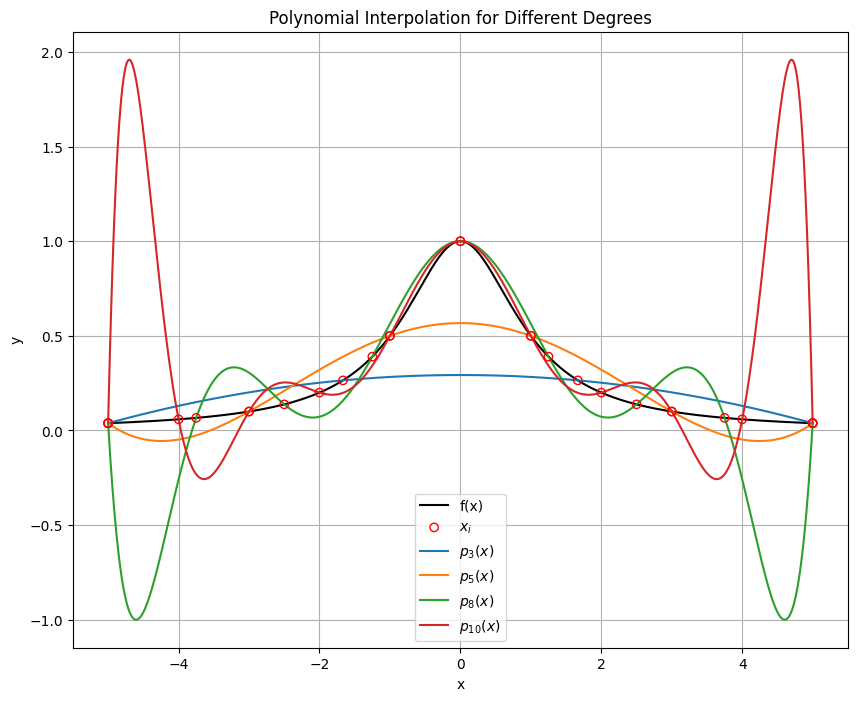

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 1 / (1 + x**2)
def vandermonde_matrix(x_values, n=None):
    n = n or len(x_values)
    A = np.zeros((len(x_values), n))
    for i in range(n):
        A[:, i] = x_values ** i
    return A
def polynomial_interpolation_with_inverse(x_points, y_points):
    A = vandermonde_matrix(x_points)
    A_inv = np.linalg.inv(A)
    c = np.dot(A_inv, y_points)
    return c
def evaluate_polynomial(x_values, coefficients):
    A_tilda = vandermonde_matrix(x_values, len(coefficients))
    y_tilda = np.dot(A_tilda, coefficients)
    return y_tilda
x_range = np.linspace(-5, 5, 1000)
n_values = [3, 5, 8, 10]

plt.figure(figsize=(10, 8))
plt.plot(x_range, f(x_range), label='f(x)', color='black')

for i, n in enumerate(n_values):
    x_points = np.linspace(-5, 5, n+1)
    y_points = f(x_points)
    c = polynomial_interpolation_with_inverse(x_points, y_points)
    y_tilda = evaluate_polynomial(x_range, c)
    if i == 0:
        plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5, label='$x_i$')
    else:
        plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5)
    plt.plot(x_range, y_tilda, label=rf'$p_{{{n}}}(x)$')   
plt.legend()
plt.title('Polynomial Interpolation for Different Degrees')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

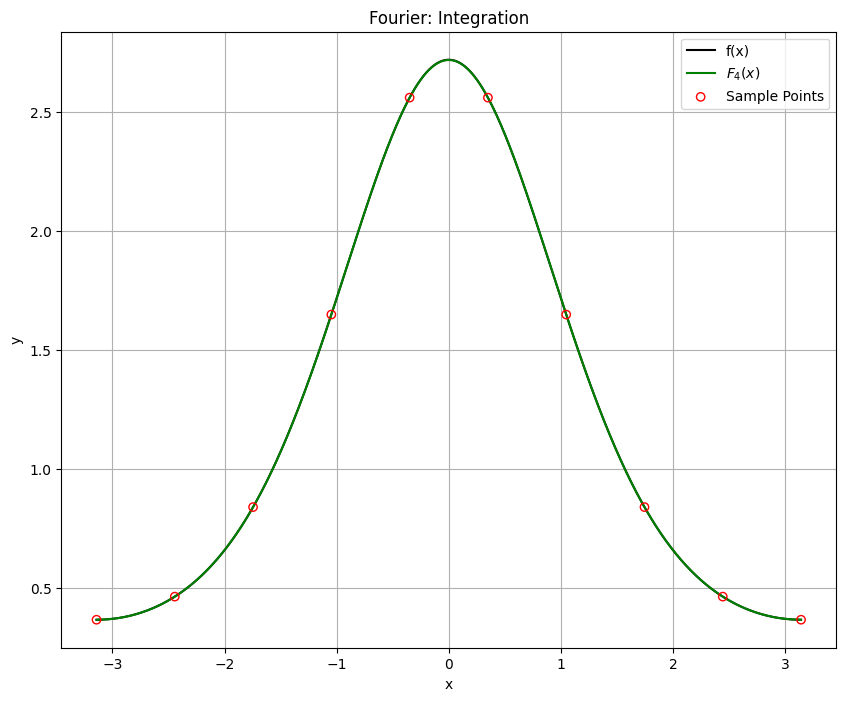

In [6]:
import numpy as np
import matplotlib.pyplot as plt
A_tilda = pseudo_vandermonde(x_points, tilda_switch=True)
A_tilda_transpose = A_tilda.T
c = 2 / (N - 1) * np.dot(A_tilda_transpose, f_vec)
y_tilda = evaluate_Fourier(x_range, c)
error_integration = np.linalg.norm(y_tilda - f(x_range), np.inf)

plt.figure(figsize=(10, 8))
plt.plot(x_range, f(x_range), label='f(x)', color='black')
plt.plot(x_range, y_tilda, label=rf'$F_{{{n}}}(x)$', color='green')
plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5, label='Sample Points')
plt.legend()
plt.title('Fourier: Integration')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

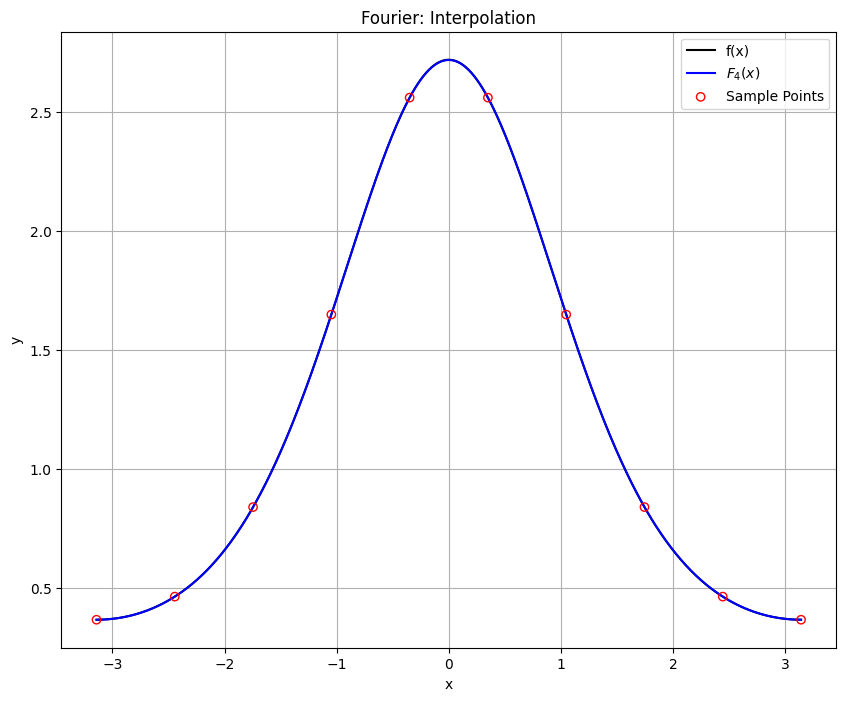

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.exp(np.cos(x))
def pseudo_vandermonde(x_values, N=None, tilda_switch=False):
    N = N or len(x_values)
    n = int((N - 2) / 2)
    A = np.zeros((len(x_values) - 1, N - 1))
    if tilda_switch:
        A[:, 0] = np.ones_like(x_values[:-1])
    else:
        A[:, 0] = np.ones_like(x_values[:-1]) / 2
    for j in range(1, n + 1):
        A[:, j] = np.cos(j * x_values[:-1])
    for j in range(n + 1, N - 1):
        A[:, j] = np.sin((j - n) * x_values[:-1])   
    return A   
def evaluate_Fourier(x_values, coefficients):
    A_tilda = pseudo_vandermonde(np.append(x_values, 0), len(coefficients) + 1)
    y_tilda = np.dot(A_tilda, coefficients)
    return y_tilda   
x_range = np.linspace(-np.pi, np.pi, 1001)
N = 10
n = int((N - 2) / 2)
x_points = np.linspace(-np.pi, np.pi, N)
y_points = f(x_points)
f_vec = f(x_points)[:-1]
A = pseudo_vandermonde(x_points)
c = np.linalg.solve(A, f_vec)
y_tilda = evaluate_Fourier(x_range, c)
error_interpolation = np.linalg.norm(y_tilda - f(x_range), np.inf)
plt.figure(figsize=(10, 8))
plt.plot(x_range, f(x_range), label='f(x)', color='black')
plt.plot(x_range, y_tilda, label=rf'$F_{{{n}}}(x)$', color='blue')
plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5, label='Sample Points')
plt.legend()
plt.title('Fourier: Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [7]:
print("Error in Interpolation: ", error_interpolation)
print("Error in Integration: ", error_integration)

Error in Interpolation:  0.0011826257944629326
Error in Integration:  0.0011826257944629326
